In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install skimpy
import skimpy as sk
import scipy.stats as stats
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import scale

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 2.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [ ]:
df = pd.read_csv('/content/student_performance_prediction.csv')

In [ ]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [ ]:
df.shape

(40000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [ ]:
df.isnull().sum().T

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [ ]:
df[df.isnull()]

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
39995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(), inplace=True)
df['Attendance Rate'].fillna(df['Attendance Rate'].mean(), inplace=True)
df['Previous Grades'].fillna(df['Previous Grades'].mean(), inplace=True)
df['Participation in Extracurricular Activities'].fillna(df['Participation in Extracurricular Activities'].mode()[0], inplace=True)
df['Parent Education Level'].fillna(df['Parent Education Level'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum().T

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,2000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().T

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0


**Understand Relationsip blw Categorical variables and the Target**

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
 #Test 1: Passed vs. Participation in Extracurricular

contingency_table1 = pd.crosstab(df['Passed'], df['Participation in Extracurricular Activities'])
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(contingency_table1)
print("\nTest 1: Passed vs. Participation in Extracurricular Activities")
print("Chi-square statistic:", chi2_1)
print("P-value:", p_1)

# Test 2: Passed vs. Parent Education Level
contingency_table2 = pd.crosstab(df['Passed'], df['Parent Education Level'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency_table2)
print("\nTest 2: Passed vs. Parent Education Level")
print("Chi-square statistic:", chi2_2)
print("P-value:", p_2)


Test 1: Passed vs. Participation in Extracurricular Activities
Chi-square statistic: 0.0006918756629859542
P-value: 0.9790152397704751

Test 2: Passed vs. Parent Education Level
Chi-square statistic: 4.030625890196897
P-value: 0.40187695301158016



How to Interpret the Results

Check the p-value:

**If p < alpha** (where alpha is your chosen significance level, usually 0.05), you reject the null hypothesis and conclude that there is a statistically significant association between the two categorical variables.


**If p >= alpha**, you fail to reject the null hypothesis, meaning there's not enough evidence to suggest an association.
Consider the chi-square statistic:

**While the p-value is the primary focus for decision-making, a larger chi-square statistic generally indicates a stronger association.**

Hence there is no enough evidence to suggest association bLw Categorical variables

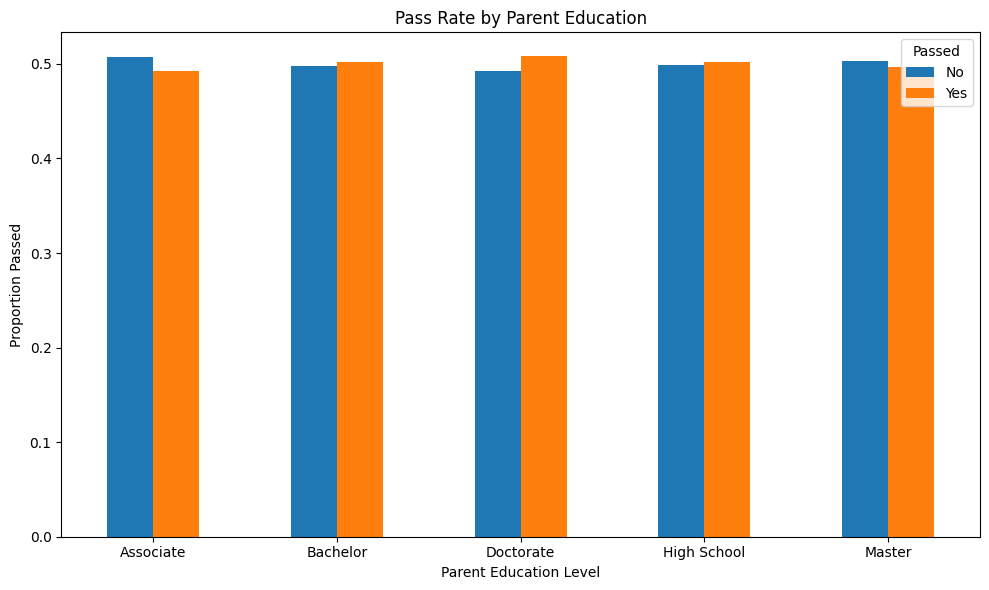

In [ ]:
grouped_data = df.groupby(['Parent Education Level'])['Passed'].value_counts(normalize=True).unstack()

# Plot the grouped bar plot
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title("Pass Rate by Parent Education")
plt.xlabel("Parent Education Level")
plt.ylabel("Proportion Passed")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title='Passed', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
df['Passed']=df['Passed'].map({'Yes': 1, 'No': 0})
df['Participation in Extracurricular Activities']=df['Participation in Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df['Parent Education Level']= df['Parent Education Level'].map({'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4})

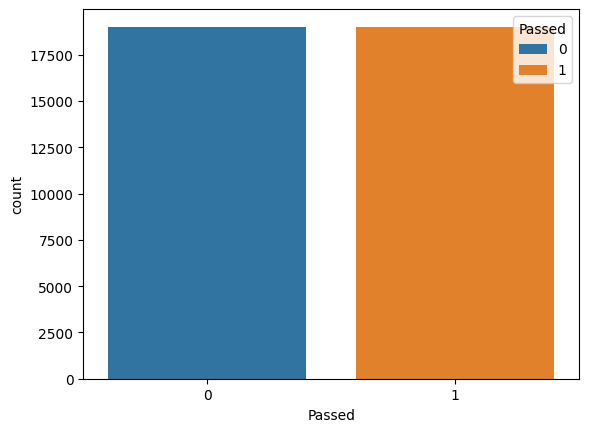

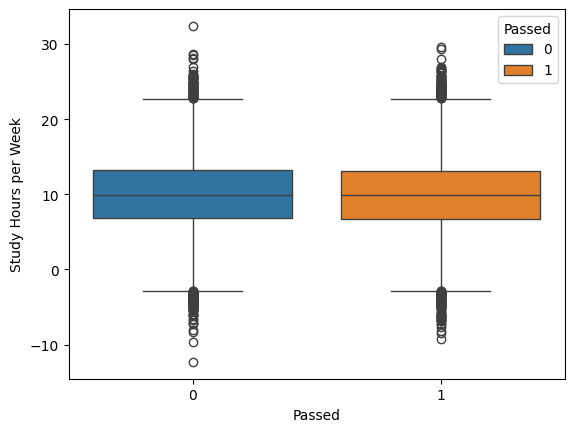

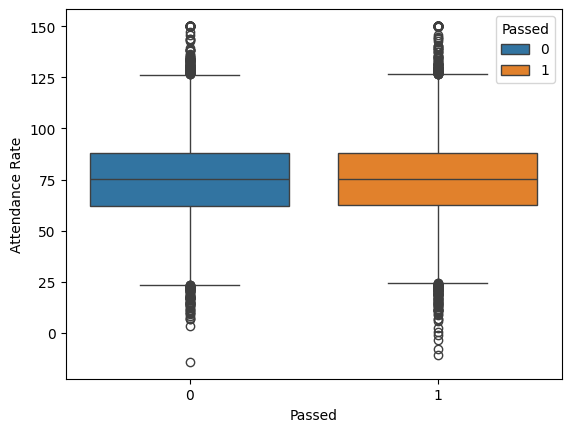

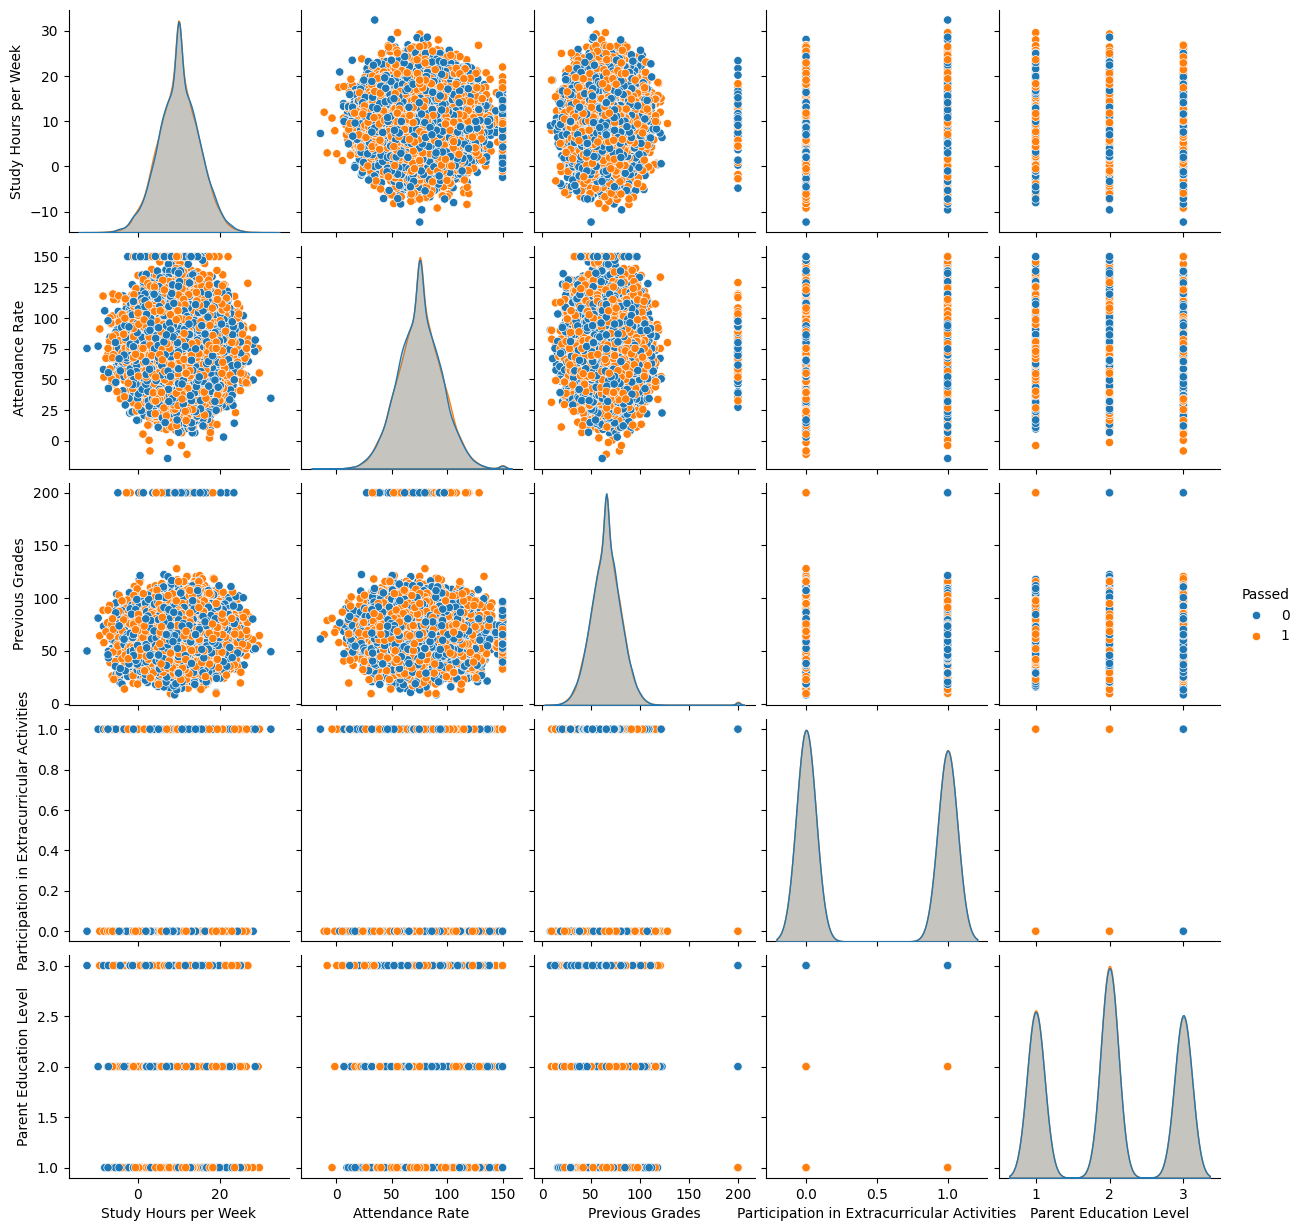

In [ ]:
# Plot distribution of target variable
sns.countplot(x='Passed', data=df,hue= 'Passed')
plt.show()

# Study hours vs Pass/Fail
sns.boxplot(x='Passed', y='Study Hours per Week',hue='Passed', data=df)
plt.show()

# Attendance Rate vs Pass/Fail
sns.boxplot(x='Passed', y='Attendance Rate', hue='Passed', data=df)
plt.show()

# Pairplot to observe relationships
sns.pairplot(df, hue='Passed')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
df['Participation in Extracurricular Activities'] = label_encoder.fit_transform(df['Participation in Extracurricular Activities'])
df['Parent Education Level'] = label_encoder.fit_transform(df['Parent Education Level'])
df['Passed'] = label_encoder.fit_transform(df['Passed'])

# Scaling numerical features
scaler = StandardScaler()
df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']] = scaler.fit_transform(df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']])

# Check the preprocessed data
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,0.517250,0.000306,0.592707,1,2,1
1,S00002,-0.135333,1.005874,-0.300708,0,0,0
2,S00003,0.660002,0.000306,-0.089763,0,3,0
3,S00004,1.557304,0.076823,-0.189031,1,1,0
4,S00005,-0.237299,0.704560,0.450009,0,2,0


In [ ]:
from re import X
X = df.drop(['Passed','Student ID'], axis=1)
Y = df['Passed']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.4906578947368421
              precision    recall  f1-score   support

           0       0.50      0.37      0.42      3859
           1       0.49      0.62      0.54      3741

    accuracy                           0.49      7600
   macro avg       0.49      0.49      0.48      7600
weighted avg       0.49      0.49      0.48      7600



**HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
y_pred_best = best_estimator.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)
print(classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.49026315789473685
              precision    recall  f1-score   support

           0       0.50      0.36      0.42      3859
           1       0.49      0.62      0.55      3741

    accuracy                           0.49      7600
   macro avg       0.49      0.49      0.48      7600
weighted avg       0.49      0.49      0.48      7600



In [ ]:
y_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

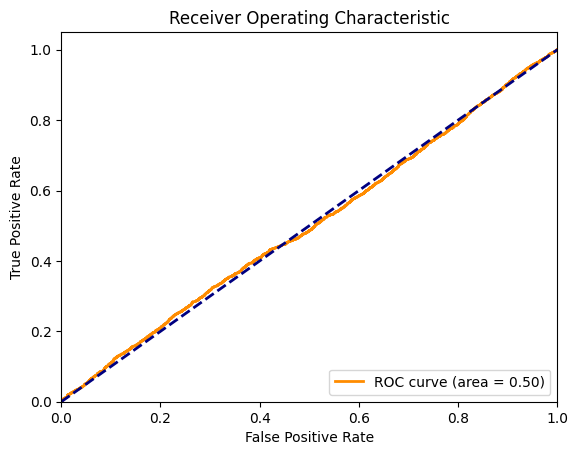

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**CLASSIFICATION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_tree = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.5057894736842106
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      3859
           1       0.50      0.51      0.50      3741

    accuracy                           0.51      7600
   macro avg       0.51      0.51      0.51      7600
weighted avg       0.51      0.51      0.51      7600



**HYPERPARAMETER TURNING FOR CLASSIFICATION TREE**

In [ ]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
best_params_tree = grid_search_tree.best_params_
best_estimator_tree = grid_search_tree.best_estimator_
print("Best Parameters for Decision Tree:", best_params_tree)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
y_pred_tree_best = best_estimator_tree.predict(X_test)
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
print("Best Decision Tree Accuracy:", accuracy_tree_best)
print(classification_report(y_test, y_pred_tree_best))

Best Decision Tree Accuracy: 0.4934210526315789
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      3859
           1       0.48      0.45      0.47      3741

    accuracy                           0.49      7600
   macro avg       0.49      0.49      0.49      7600
weighted avg       0.49      0.49      0.49      7600



**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.4968421052631579
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      3859
           1       0.49      0.49      0.49      3741

    accuracy                           0.50      7600
   macro avg       0.50      0.50      0.50      7600
weighted avg       0.50      0.50      0.50      7600



**HYPERPARAMETER TURNING FOR RANDOM FOREST**

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", best_params_rf)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
y_pred_rf_best = best_estimator_rf.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print("Best Random Forest Accuracy:", accuracy_rf_best)
print(classification_report(y_test, y_pred_rf_best))

Best Random Forest Accuracy: 0.5002631578947369
              precision    recall  f1-score   support

           0       0.51      0.41      0.45      3859
           1       0.49      0.60      0.54      3741

    accuracy                           0.50      7600
   macro avg       0.50      0.50      0.50      7600
weighted avg       0.50      0.50      0.50      7600

